In [1]:
import pandas as pd
import FinanceDataReader as fdr
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, GRU, Average, Dropout, Dense, Concatenate, LSTM, Conv1D, BatchNormalization
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')


start_date = '2000-01-01'
end_date = '2019-12-31'

## Two stock market indices
1. DOW: ดาว โจนส์ อินดัสเทรียล แอเวอร์เรจ (Dow Jones Industrial Average) ซึ่งเป็นดัชนีหุ้นที่ประกอบด้วย 30 บริษัทที่มีชื่อเสียงในสหรัฐอเมริกา

2. S&P500: สแตนดาร์ดแอนด์พอร์ (Standard and Poor’s) 500 ซึ่งเป็นดัชนีหุ้นที่ประกอบด้วยบริษัทขนาดใหญ่ 500 บริษัทในสหรัฐอเมริกา

## Feature ในชุดข้อมูลที่แสดงมามีความหมายดังนี้:
1. Open: ราคาเปิด (Open price) คือ ราคาที่หุ้นเปิดขึ้นในวันที่กำหนด

2. High: ราคาสูงสุด (High price) คือ ราคาสูงสุดที่หุ้นแต่ละใบแพงถึงในวันนั้น

3. Low: ราคาต่ำสุด (Low price) คือ ราคาต่ำสุดที่หุ้นแต่ละใบตกถึงในวันนั้น

4. Close: ราคาปิด (Close price) คือ ราคาที่หุ้นปิดลงในวันที่กำหนด

5. Adj Close: ราคาปิดที่ปรับแก้ (Adjusted Close price) คือ ราคาปิดที่ถูกปรับแก้เพื่อแสดงผลในกรณีที่มีการแจกเงินปันผลหรือเหตุการณ์อื่นๆ ที่ส่งผลต่อราคา

6. Volume: ปริมาณการซื้อขาย (Trading Volume) คือ ปริมาณหุ้นที่ถูกซื้อขายในวันนั้น

# Import Data

In [2]:
# DOW (DJI) Jones Industrial Average 
dow_data = fdr.DataReader('DJI', start=start_date, end=end_date)

# S&P500 (US500)
sp500_data = fdr.DataReader('US500', start=start_date, end=end_date)

In [3]:
dow_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,11501.849609,11522.009766,11305.690430,11357.509766,11357.509766,169750000
2000-01-04,11349.750000,11350.059570,10986.450195,10997.929688,10997.929688,178420000
2000-01-05,10989.370117,11215.099609,10938.669922,11122.650391,11122.650391,203190000
2000-01-06,11113.370117,11313.450195,11098.450195,11253.259766,11253.259766,176550000
2000-01-07,11247.059570,11528.139648,11239.919922,11522.559570,11522.559570,184900000
...,...,...,...,...,...,...
2019-12-23,28491.779297,28582.490234,28491.779297,28551.529297,28551.529297,223530000
2019-12-24,28572.570313,28576.800781,28503.210938,28515.449219,28515.449219,86150000
2019-12-26,28539.460938,28624.099609,28535.150391,28621.390625,28621.390625,155970000


In [4]:
sp500_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3064530000
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296530000
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2164540000


In [5]:
dow_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5030 entries, 2000-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5030 non-null   float64
 1   High       5030 non-null   float64
 2   Low        5030 non-null   float64
 3   Close      5030 non-null   float64
 4   Adj Close  5030 non-null   float64
 5   Volume     5030 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.1 KB


In [6]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5030 entries, 2000-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5030 non-null   float64
 1   High       5030 non-null   float64
 2   Low        5030 non-null   float64
 3   Close      5030 non-null   float64
 4   Adj Close  5030 non-null   float64
 5   Volume     5030 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.1 KB


# EDA (Exploratory Data Analysis)

In [7]:
dow_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5.030000e+03
mean,14035.226975,14115.548739,13951.567699,14037.820207,14037.820207,2.186872e+08
std,5194.007415,5203.047807,5183.676283,5194.703363,5194.703363,9.925254e+07
min,6547.009766,6709.609863,6469.950195,6547.049805,6547.049805,8.410000e+06
25%,10416.807373,10480.887207,10357.219971,10415.632568,10415.632568,1.440375e+08
50%,12103.160156,12182.915039,12029.725097,12105.665039,12105.665039,2.148600e+08
75%,17009.267578,17081.026856,16939.777832,17006.514648,17006.514648,2.727575e+08
max,28675.339844,28701.660156,28608.980469,28645.259766,28645.259766,9.005100e+08


In [8]:
sp500_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5.030000e+03
mean,1574.497789,1583.378223,1564.876074,1574.680111,1574.680111,3.094057e+09
std,585.436198,586.162939,584.560782,585.531515,585.531515,1.474942e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1151.739990,1159.932526,1142.175018,1151.534942,1151.534942,1.672400e+09
50%,1360.769959,1368.820007,1349.979981,1360.954956,1360.954956,3.223360e+09
75%,1985.139954,1992.422455,1975.535003,1986.222473,1986.222473,3.922188e+09
max,3247.229980,3247.929932,3234.370117,3240.020020,3240.020020,1.145623e+10


## Time Series Plot
เป็นกระบวนการที่นำข้อมูลเวลา (time series data) มาแสดงในรูปแบบของกราฟเพื่อให้เห็นแนวโน้มและความเปลี่ยนแปลงของข้อมูลตามเวลาได้ง่ายขึ้น ซึ่งมักใช้ในการวิเคราะห์และสร้างสัญญาณกราฟิกเพื่อนำมาเข้าใจแนวโน้มของข้อมูลและการเปลี่ยนแปลงของมันในระยะเวลาที่ต่าง ๆ ได้ดีขึ้น

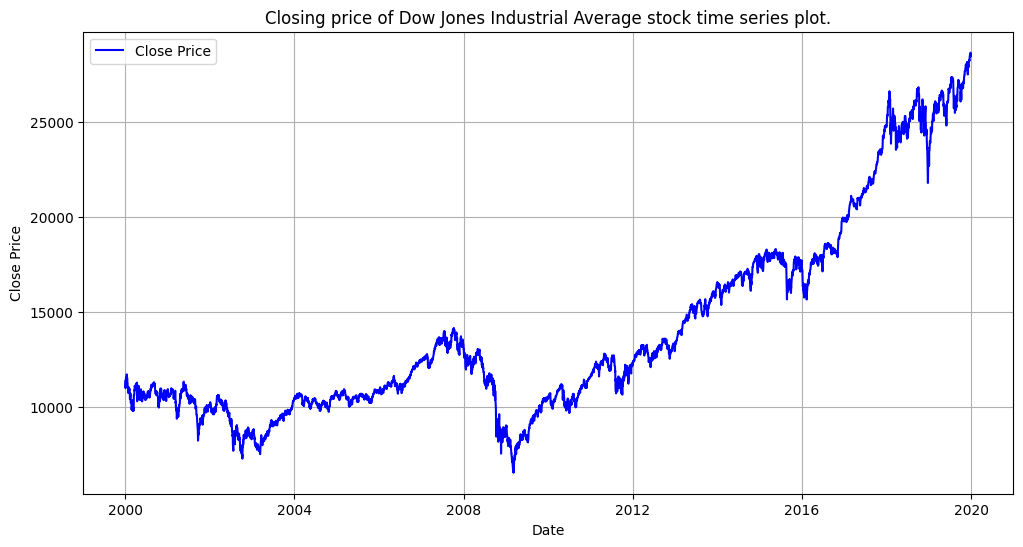

In [9]:
plt.figure(figsize=(12, 6)) 
plt.plot(dow_data['Close'], label='Close Price', color='blue')
plt.xlabel('Date')  
plt.ylabel('Close Price')  
plt.title('Closing price of Dow Jones Industrial Average stock time series plot.')  
plt.legend()  
plt.grid(True)  
plt.show()

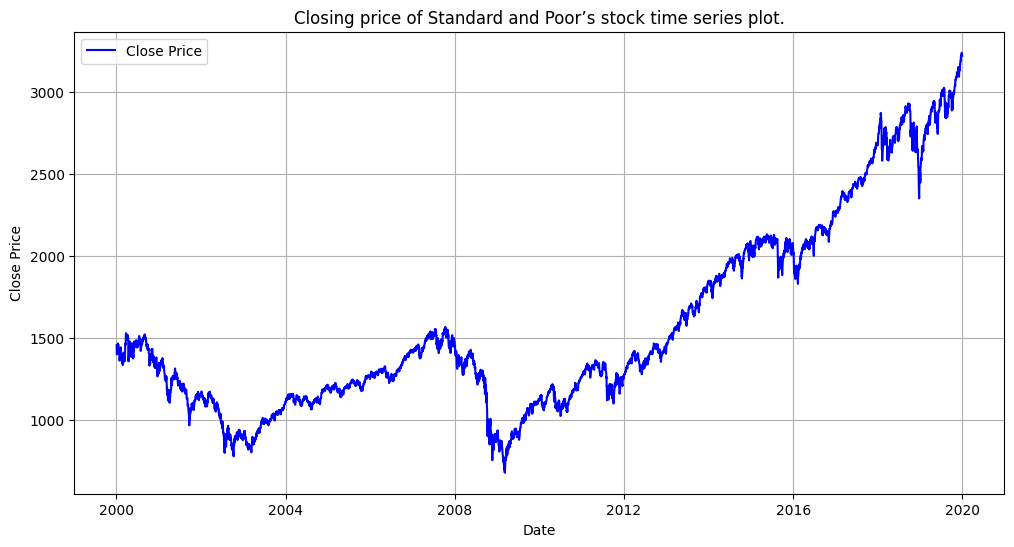

In [10]:
plt.figure(figsize=(12, 6)) 
plt.plot(sp500_data['Close'], label='Close Price', color='blue')
plt.xlabel('Date')  
plt.ylabel('Close Price')  
plt.title('Closing price of Standard and Poor’s stock time series plot.')  
plt.legend()  
plt.grid(True)  
plt.show()

ค่าส่วนเสมอศูนย์ (variance) เป็นค่าทางสถิติที่ใช้วัดระดับการกระจายหรือความแปรปรวนของข้อมูลในชุดข้อมูล. ค่าส่วนเสมอศูนย์บ่งบอกถึงความแตกต่างหรือการกระจายของข้อมูลจากค่าเฉลี่ยของข้อมูลนั้นๆ โดยค่าส่วนเสมอศูนย์จะเป็นค่าบวกและมีค่ามากขึ้นเมื่อข้อมูลกระจายห่างกันมากขึ้น และมีค่าน้อยลงเมื่อข้อมูลมีความเข้าใกล้ค่าเฉลี่ยกันมากขึ้น.

In [11]:
variance_close_DOW = np.var(dow_data['Close'])
print(f"Variance of Close Price of Dow Jones Industrial Average stock: {variance_close_DOW:.2f}")
variance_close_sp500 = np.var(sp500_data['Close'])
print(f"Variance of Close Price of Standard and Poor’s stock: {variance_close_sp500:.2f}")

Variance of Close Price of Dow Jones Industrial Average stock: 26979578.23
Variance of Close Price of Standard and Poor’s stock: 342778.99


## Histogram
เป็นกระบวนการทางสถิติที่ใช้ในการแสดงการกระจายของข้อมูล โดยการแบ่งช่วงของข้อมูลออกเป็นกลุ่มหรือช่วงเล็ก ๆ ที่เรียกว่า "บิน" (bin) และนับจำนวนข้อมูลที่ตกอยู่ในแต่ละบินนั้น ๆ จากนั้นแสดงบินแต่ละช่วงบนกราฟแท่ง ซึ่งจะช่วยในการสังเกตแนวโน้มและการกระจายของข้อมูลได้ง่ายขึ้น

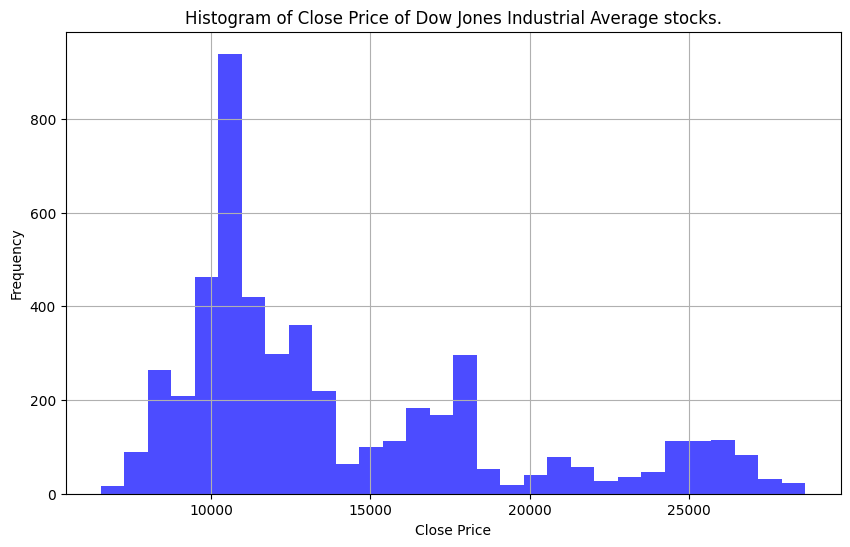

In [12]:
plt.figure(figsize=(10, 6)) 
plt.hist(dow_data['Close'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Close Price')  
plt.ylabel('Frequency') 
plt.title('Histogram of Close Price of Dow Jones Industrial Average stocks.')
plt.grid(True) 
plt.show()

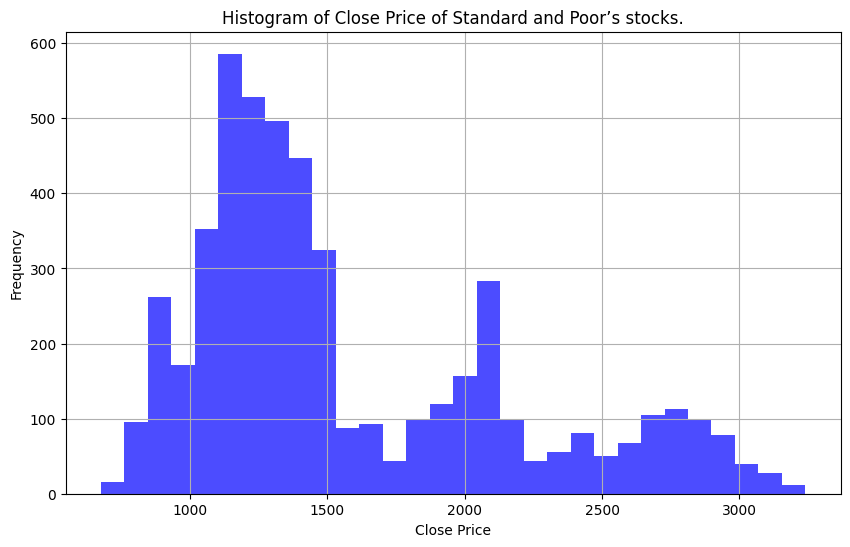

In [13]:
plt.figure(figsize=(10, 6)) 
plt.hist(sp500_data['Close'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Close Price')  
plt.ylabel('Frequency') 
plt.title('Histogram of Close Price of Standard and Poor’s stocks.')
plt.grid(True) 
plt.show()

## Heatmap 
เป็นกระบวนการทางสถิติที่ใช้สร้างกราฟที่มีลักษณะตารางสี่เหลี่ยมที่แสดงความสัมพันธ์ระหว่างข้อมูลแต่ละคู่ในรูปแบบของสี โดยค่าข้อมูลจะถูกแสดงในลักษณะของสีที่แสดงความค่อนข้างระหว่างข้อมูลแต่ละคู่ สีจะบ่งบอกความสัมพันธ์ของข้อมูลโดยใช้สเกลสีที่กำหนดไว้ ซึ่งมักจะใช้สีที่ต่างกันระหว่างค่าต่ำถึงค่าสูง หรือค่าน้อยถึงค่ามาก เพื่อช่วยในการแสดงข้อมูลแบบกราฟิกที่เข้าใจง่ายและรวมข้อมูลได้อย่างชัดเจน

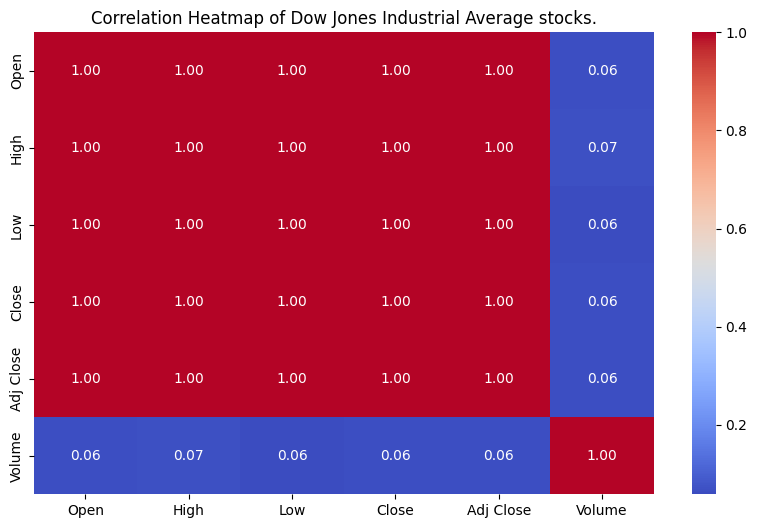

In [14]:
correlation_matrix_DOW = dow_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_DOW, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Dow Jones Industrial Average stocks.')
plt.show()

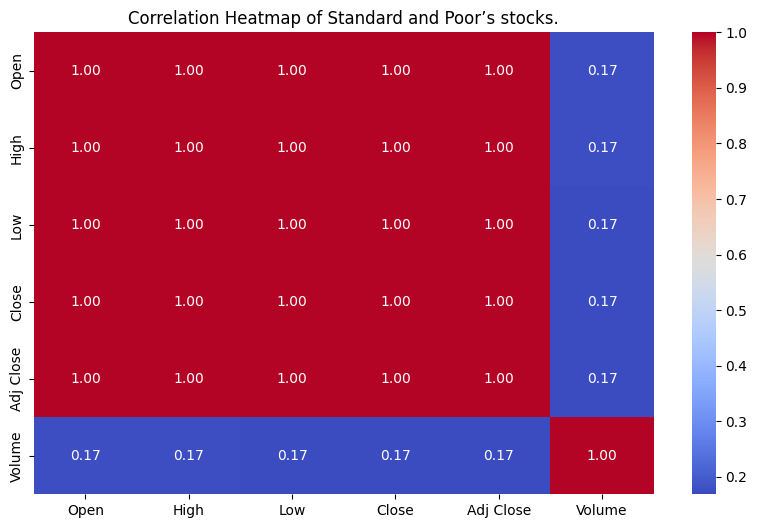

In [15]:
correlation_matrix_sp500 = sp500_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_sp500, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Standard and Poor’s stocks.')
plt.show()

## Scatter plot (กราฟแบบกระจาย) 
เป็นวิธีการแสดงข้อมูลแบบกราฟที่ใช้สองตัวแปร (variables) ในรูปแบบของจุด (points) บนแผนกราฟเพื่อศึกษาและแสดงความสัมพันธ์ระหว่างตัวแปรทั้งสอง โดยแต่ละจุดบน scatter plot จะแทนข้อมูลของคู่ตัวแปรที่ตรงกับตำแหน่งแกน x และแกน y ของจุดนั้น ๆ โดยค่า x จะแทนตัวแปรหนึ่งและค่า y จะแทนตัวแปรอีกหนึ่งตัวแปร ซึ่งสามารถใช้ในการสังเกตแนวโน้มและความสัมพันธ์ระหว่างตัวแปรได้อย่างชัดเจน

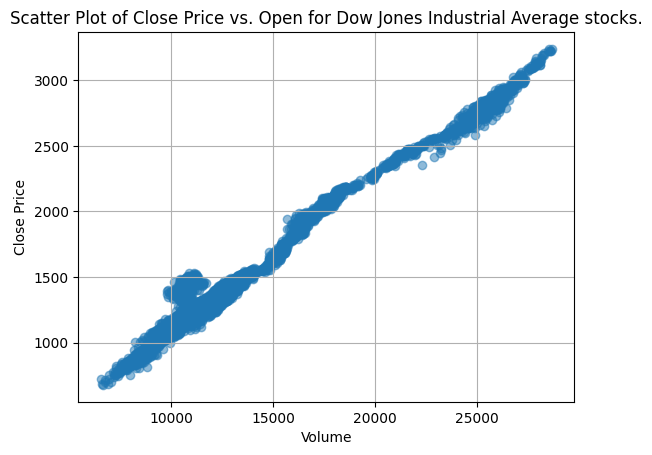

In [16]:
plt.scatter(dow_data['Open'], sp500_data['Close'], alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Scatter Plot of Close Price vs. Open for Dow Jones Industrial Average stocks.')
plt.grid(True)
plt.show()

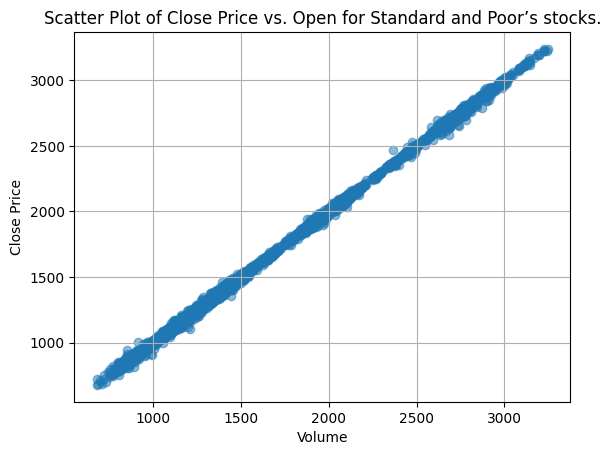

In [17]:
plt.scatter(sp500_data['Open'], sp500_data['Close'], alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Scatter Plot of Close Price vs. Open for Standard and Poor’s stocks.')
plt.grid(True)
plt.show()

## "Resampling" or "Time Series Resampling"
เป็นการจับกลุ่มข้อมูลและการแบ่งช่วงเวลาของข้อมูลเวลา (time series data) ซึ่งเป็นกระบวนการที่ใช้ในการเปลี่ยนความถี่ของข้อมูลเวลา โดยรวมข้อมูลในช่วงเวลาที่กำหนดเพื่อให้เหมาะสมกับการวิเคราะห์หรือการสร้างกราฟในระบบข้อมูลที่มีความแตกต่างของความถี่ เช่น การจับกลุ่มข้อมูลรายวันเป็นข้อมูลรายสัปดาห์หรือรายเดือน.

In [18]:
weekly_close_DOW = dow_data['Close'].resample('W').mean()
monthly_close_DOW = dow_data['Close'].resample('M').mean()

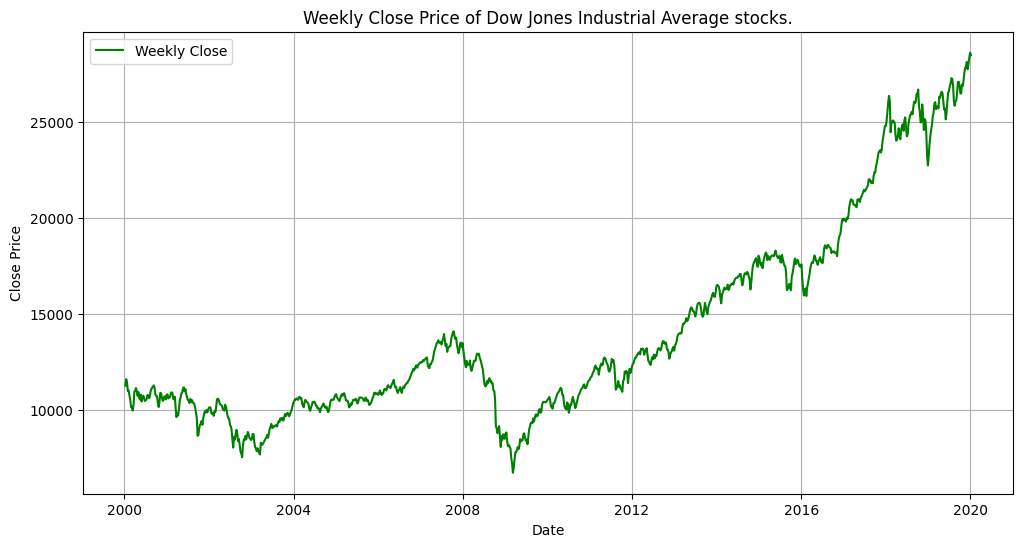

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_close_DOW.index, weekly_close_DOW, label='Weekly Close', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Weekly Close Price of Dow Jones Industrial Average stocks.')
plt.legend()
plt.grid(True)
plt.show()

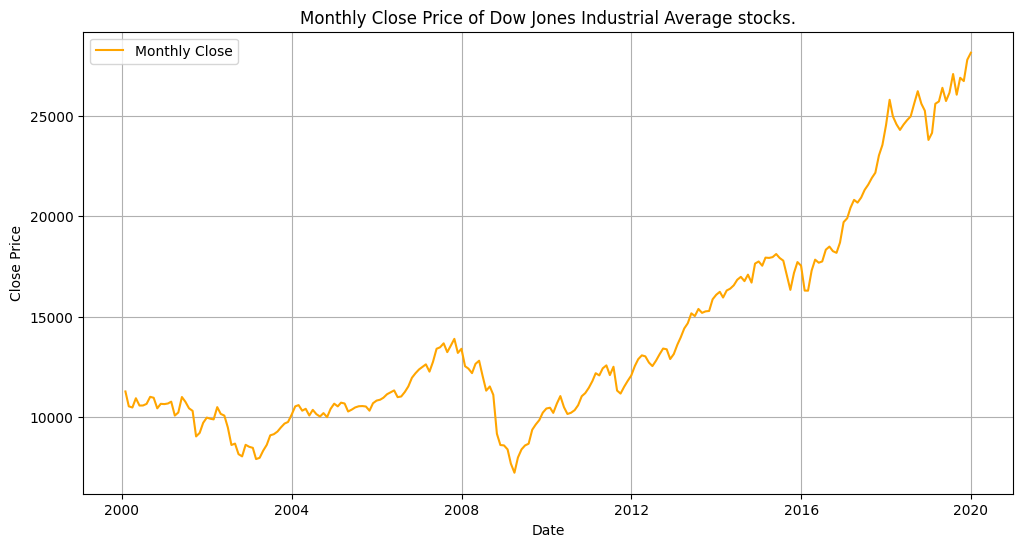

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_close_DOW.index, monthly_close_DOW, label='Monthly Close', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Monthly Close Price of Dow Jones Industrial Average stocks.')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
weekly_close_sp500 = sp500_data['Close'].resample('W').mean()
monthly_close_sp500 = sp500_data['Close'].resample('M').mean()

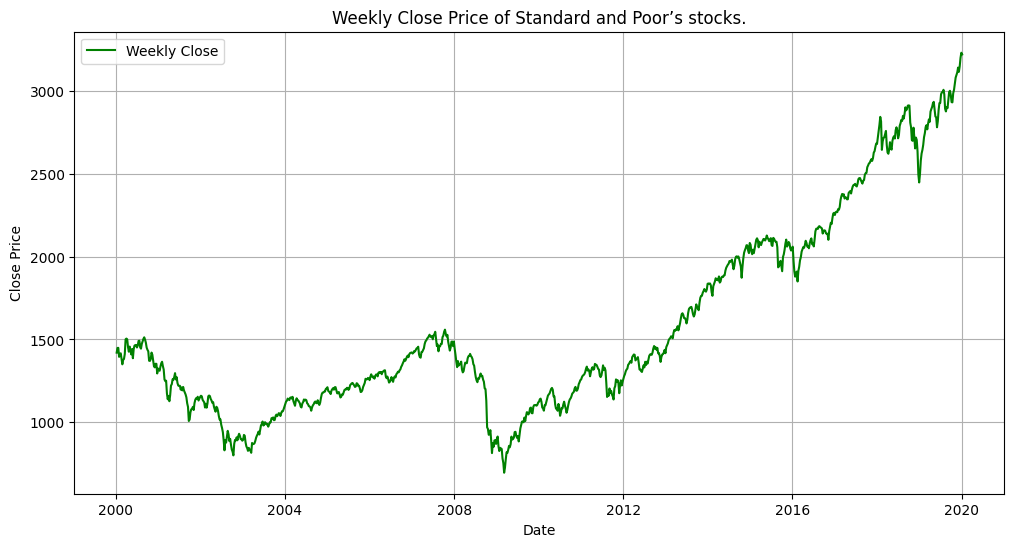

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_close_sp500.index, weekly_close_sp500, label='Weekly Close', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Weekly Close Price of Standard and Poor’s stocks.')
plt.legend()
plt.grid(True)
plt.show()

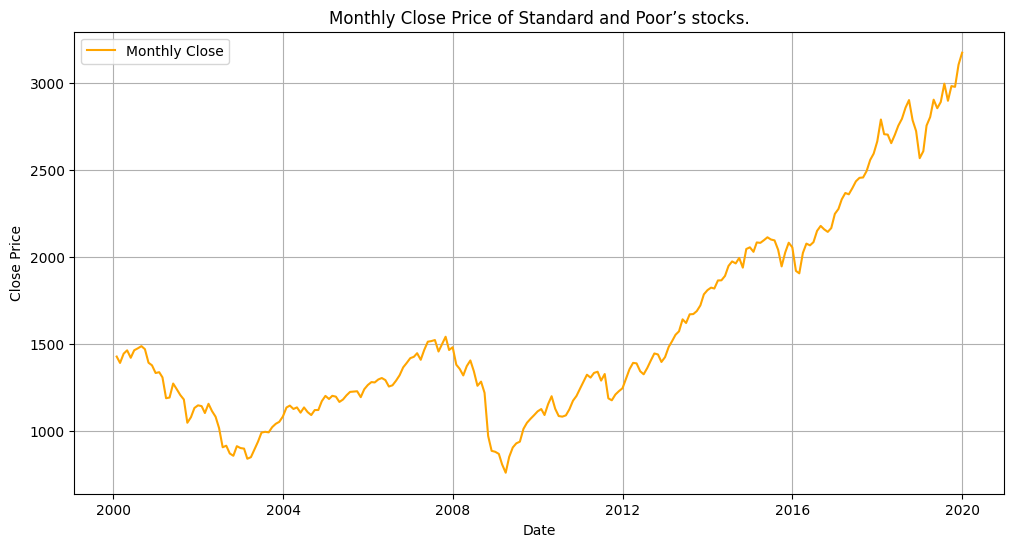

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_close_sp500.index, monthly_close_sp500, label='Monthly Close', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Monthly Close Price of Standard and Poor’s stocks.')
plt.legend()
plt.grid(True)
plt.show()

## Preprocessing data

In [24]:
dow_data_scaled = dow_data
sp500_data_scaled = sp500_data

### MinMaxScaler 
เป็นเทคนิคในการปรับค่าข้อมูลให้อยู่ในช่วงค่าระหว่าง 0 ถึง 1 โดยการปรับค่าข้อมูลให้มีค่าน้อยที่สุดเท่ากับ 0 และค่ามากที่สุดเท่ากับ 1 ซึ่งช่วยในการทำให้ข้อมูลมีการกระจายแบบคงที่ และเปรียบเทียบข้อมูลที่มีหน่วยวัดหรือมาตรฐานที่แตกต่างกันได้ง่ายขึ้น โดยมีสมการดังนี้

**X_new = (X - X_min) / (X_max - X_min)**

In [25]:
scaler = MinMaxScaler()
dow_data_scaled[['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']] = scaler.fit_transform(dow_data[['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']])
sp500_data_scaled[['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']] = scaler.fit_transform(sp500_data[['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']])

In [26]:
train_data_dow, test_data_dow = train_test_split(dow_data_scaled, test_size=0.2, shuffle=False)

In [27]:
train_data_sp500, test_data_sp500 = train_test_split(sp500_data_scaled, test_size=0.2, shuffle=False)

In [28]:
train_data_dow, val_data_dow = train_test_split(train_data_dow, test_size=0.1, shuffle=False)

In [29]:
train_data_sp500, val_data_sp500 = train_test_split(train_data_sp500, test_size=0.1, shuffle=False)

In [30]:
def create_sequences(data, window_size, look_ahead):
    X, y = [], []
    for i in range(len(data) - window_size - look_ahead + 1):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size:i + window_size + look_ahead])
    return np.array(X), np.array(y)

### ระยะเวลาการสังเกตย้อนหลัง (look-back periods)
คือช่วงเวลาที่ใช้ในการดูข้อมูลย้อนหลังเพื่อทำนายสิ่งใดสิ่งหนึ่งในอนาคตหรือวิเคราะห์ข้อมูลในอดีตเพื่อหาแนวโน้มหรือรูปแบบที่อาจมีผลต่อข้อมูลในระหว่างระยะเวลานั้น แทนด้วยตัวแปร **window_size**

### ระยะเวลาการสังเกตล่วงหน้า (look-ahead periods) 
คือช่วงเวลาที่นำมาใช้ในการทำนายสิ่งใดสิ่งหนึ่งในอนาคต ระยะเวลานี้ช่วยในการกำหนดว่าข้อมูลที่จะถูกทำนายคือข้อมูลในอนาคตในช่วงเวลาใด เป็นการกำหนดระยะเวลาที่ใช้ในการทำนายข้อมูลหลังจากข้อมูลที่ใช้ในการฝึกโมเดลและการสังเกตย้อนหลัง (look-back periods) แทนด้วยตัวแปร **look_ahead**

In [31]:
window_size = 42  # หมายถึงดูข้อมูลย้อนหลัง 5 วัน
look_ahead = 1   # หมายถึงทำนายข้อมูล 1 วัน
num_features = 6 # จำนวน features ที่ใช้

In [32]:
dow_data_scaled

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.223914,0.218825,0.218426,0.217686,0.217686,0.180854
2000-01-04,0.217040,0.211006,0.204006,0.201414,0.201414,0.190573
2000-01-05,0.200754,0.204869,0.201848,0.207058,0.207058,0.218339
2000-01-06,0.206358,0.209341,0.209065,0.212968,0.212968,0.188477
2000-01-07,0.212400,0.219103,0.215455,0.225154,0.225154,0.197837
...,...,...,...,...,...,...
2019-12-23,0.991705,0.994581,0.994706,0.995758,0.995758,0.241139
2019-12-24,0.995356,0.994323,0.995222,0.994126,0.994126,0.087143
2019-12-26,0.993860,0.996473,0.996665,0.998920,0.998920,0.165407


In [33]:
X_train_dow, y_train_dow = create_sequences(train_data_dow, window_size, look_ahead)
X_val_dow, y_val_dow = create_sequences(val_data_dow, window_size, look_ahead)
X_test_dow, y_test_dow = create_sequences(test_data_dow, window_size, look_ahead)

In [34]:
X_train_sp500, y_train_sp500 = create_sequences(train_data_sp500, window_size, look_ahead)
X_val_sp500, y_val_sp500 = create_sequences(val_data_sp500, window_size, look_ahead)
X_test_sp500, y_test_sp500 = create_sequences(test_data_sp500, window_size, look_ahead)

# Predict close of DOW

## Create LSTM model 

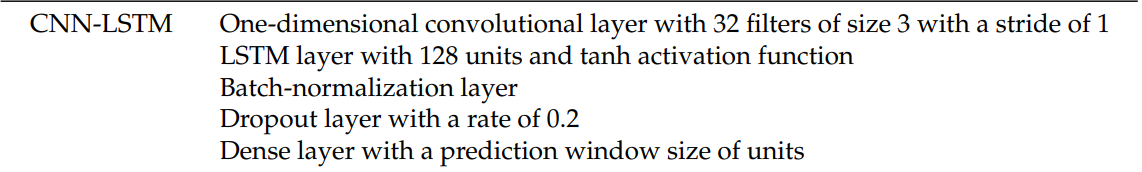

In [35]:
input_layer = Input(shape=(window_size, num_features))  # แทนค่า window_size และ num_features ด้วยค่าที่เหมาะสม

conv1d_layer = Conv1D(32, kernel_size=3, strides=1, activation='relu')(input_layer)

lstm_layer = LSTM(128, activation='tanh')(conv1d_layer)

batch_norm_layer = BatchNormalization()(lstm_layer)

dropout_layer = Dropout(0.2)(batch_norm_layer)

dense_layer = Dense(look_ahead)(dropout_layer)

lstm_model_DOW = Model(inputs=input_layer, outputs=dense_layer)


from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  
lstm_model_DOW.compile(optimizer=optimizer, loss='huber_loss', metrics=['mae'])

lstm_model_DOW._name = "LSTM_Model_DOW"

In [36]:
lstm_model_DOW.summary()

Model: "LSTM_Model_DOW"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 42, 6)]           0         
                                                                 
 conv1d (Conv1D)             (None, 40, 32)            608       
                                                                 
 lstm (LSTM)                 (None, 128)               82432     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                    

In [37]:
epochs = 50
early_stopping_patience = 10
model_checkpoint_file_lstm_DOW = 'LSTM_Model_DOW.h5'
model_checkpoint_file_ensemble_DOW = 'Ensemble_Model_DOW.h5'
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, verbose=1, restore_best_weights=True)
model_checkpoint_lstm_DOW = ModelCheckpoint(model_checkpoint_file_lstm_DOW, monitor='val_loss', save_best_only=True, verbose=1)
model_checkpoint_ensemble_DOW = ModelCheckpoint(model_checkpoint_file_ensemble_DOW, monitor='val_loss', save_best_only=True, verbose=1)

In [38]:
model_checkpoint_file_lstm_sp500 = 'LSTM_Model_sp500.h5'
model_checkpoint_file_ensemble_sp500 = 'Ensemble_Model_sp500.h5'
model_checkpoint_lstm_sp500 = ModelCheckpoint(model_checkpoint_file_lstm_sp500, monitor='val_loss', save_best_only=True, verbose=1)
model_checkpoint_ensemble_sp500 = ModelCheckpoint(model_checkpoint_file_ensemble_sp500, monitor='val_loss', save_best_only=True, verbose=1)

In [39]:
history_lstm_DOW = lstm_model_DOW.fit(X_train_dow, y_train_dow, epochs=epochs, 
                            validation_data=(X_val_dow, y_val_dow),
                            callbacks=[early_stopping, model_checkpoint_lstm_DOW])

Epoch 1/50
111/112 [============================>.] - ETA: 0s - loss: 0.0211 - mae: 0.1477
Epoch 1: val_loss improved from inf to 0.03454, saving model to LSTM_Model_DOW.h5
112/112 [==============================] - 11s 56ms/step - loss: 0.0210 - mae: 0.1474 - val_loss: 0.0345 - val_mae: 0.2535
Epoch 2/50
111/112 [============================>.] - ETA: 0s - loss: 0.0078 - mae: 0.0959
Epoch 2: val_loss did not improve from 0.03454
112/112 [==============================] - 5s 45ms/step - loss: 0.0077 - mae: 0.0958 - val_loss: 0.0397 - val_mae: 0.2686
Epoch 3/50
111/112 [============================>.] - ETA: 0s - loss: 0.0060 - mae: 0.0851
Epoch 3: val_loss did not improve from 0.03454
112/112 [==============================] - 5s 47ms/step - loss: 0.0060 - mae: 0.0851 - val_loss: 0.0372 - val_mae: 0.2614
Epoch 4/50
111/112 [============================>.] - ETA: 0s - loss: 0.0053 - mae: 0.0805
Epoch 4: val_loss improved from 0.03454 to 0.02677, saving model to LSTM_Model_DOW.h5
112/112

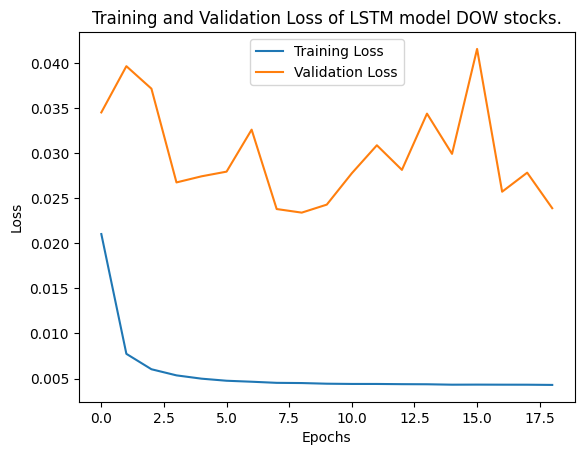

In [40]:
plt.plot(history_lstm_DOW.history['loss'], label='Training Loss')
plt.plot(history_lstm_DOW.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of LSTM model DOW stocks.')
plt.legend()

plt.show()

In [42]:
values_dow = [y_test_dow[i, 0, 0] for i in range(964)]

## Create Ensemble model

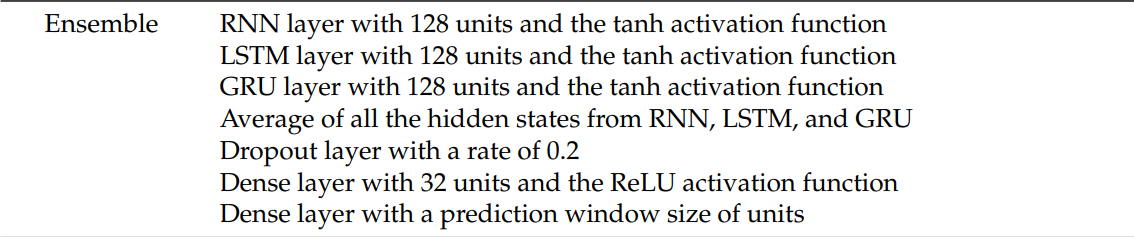

In [43]:
input_layer = Input(shape=(window_size, num_features))  

rnn_layer = SimpleRNN(128, activation='tanh')(input_layer)

lstm_layer = LSTM(128, activation='tanh')(input_layer)

gru_layer = GRU(128, activation='tanh')(input_layer)

average_layer = Average()([rnn_layer, lstm_layer, gru_layer])

dropout_layer = Dropout(0.2)(average_layer)

dense_layer1 = Dense(32, activation='relu')(dropout_layer)

dense_layer2 = Dense(look_ahead)(dense_layer1)

Ensemble_Model_DOW = Model(inputs=input_layer, outputs=dense_layer2)

from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)
Ensemble_Model_DOW.compile(optimizer=optimizer, loss='huber_loss', metrics=['mae'])

Ensemble_Model_DOW._name = "Ensemble_Model"

In [44]:
Ensemble_Model_DOW.summary()

Model: "Ensemble_Model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 42, 6)]              0         []                            
                                                                                                  
 simple_rnn (SimpleRNN)      (None, 128)                  17280     ['input_2[0][0]']             
                                                                                                  
 lstm_1 (LSTM)               (None, 128)                  69120     ['input_2[0][0]']             
                                                                                                  
 gru (GRU)                   (None, 128)                  52224     ['input_2[0][0]']             
                                                                                     

In [45]:
history_ensemble_DOW = Ensemble_Model_DOW.fit(X_train_dow, y_train_dow, epochs=epochs, 
                            validation_data=(X_val_dow, y_val_dow),
                            callbacks=[early_stopping, model_checkpoint_ensemble_DOW])

Epoch 1/50
112/112 [==============================] - ETA: 0s - loss: 0.0055 - mae: 0.0805
Epoch 1: val_loss improved from inf to 0.03404, saving model to Ensemble_Model_DOW.h5
112/112 [==============================] - 17s 81ms/step - loss: 0.0055 - mae: 0.0805 - val_loss: 0.0340 - val_mae: 0.2519
Epoch 2/50
112/112 [==============================] - ETA: 0s - loss: 0.0045 - mae: 0.0736
Epoch 2: val_loss improved from 0.03404 to 0.03070, saving model to Ensemble_Model_DOW.h5
112/112 [==============================] - 7s 64ms/step - loss: 0.0045 - mae: 0.0736 - val_loss: 0.0307 - val_mae: 0.2410
Epoch 3/50
112/112 [==============================] - ETA: 0s - loss: 0.0044 - mae: 0.0733
Epoch 3: val_loss did not improve from 0.03070
112/112 [==============================] - 8s 69ms/step - loss: 0.0044 - mae: 0.0733 - val_loss: 0.0371 - val_mae: 0.2612
Epoch 4/50
112/112 [==============================] - ETA: 0s - loss: 0.0044 - mae: 0.0728
Epoch 4: val_loss did not improve from 0.03070

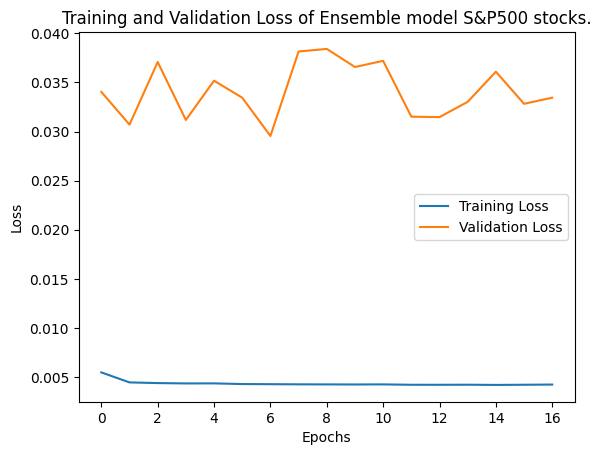

In [46]:
plt.plot(history_ensemble_DOW.history['loss'], label='Training Loss')
plt.plot(history_ensemble_DOW.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of Ensemble model S&P500 stocks.')
plt.legend()

plt.show()

31/31 [==============================] - 1s 17ms/step


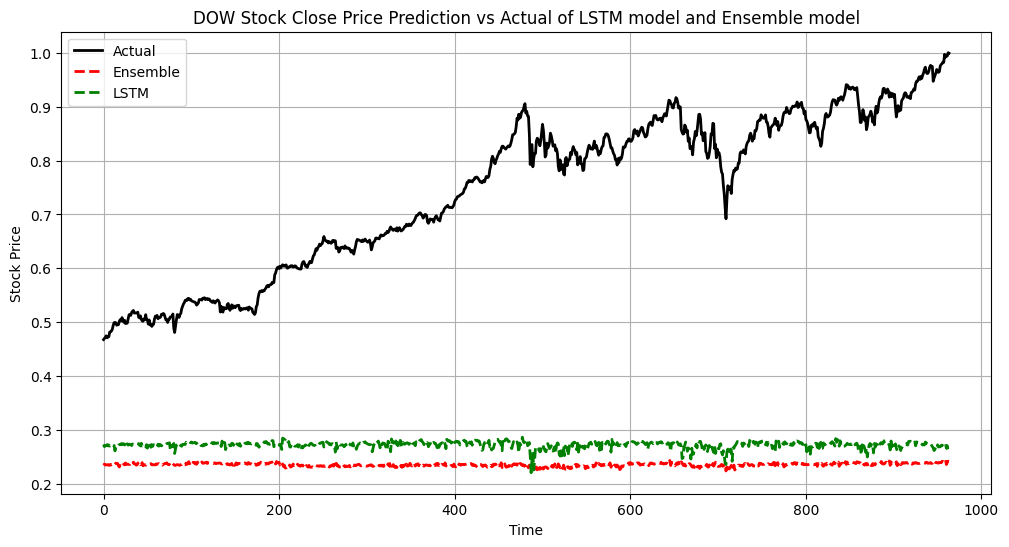

In [47]:
y_pred_ensemble_dow = Ensemble_Model_DOW.predict(X_test_dow)
y_pred_lstm_dow = lstm_model_DOW.predict(X_test_dow)

plt.figure(figsize=(12, 6))
plt.plot(values_dow, label='Actual', color='black', linewidth=2)
plt.plot(y_pred_ensemble_dow, label='Ensemble', color='red', linewidth=2, linestyle='dashed')
plt.plot(y_pred_lstm_dow, label='LSTM', color='green', linewidth=2, linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('DOW Stock Close Price Prediction vs Actual of LSTM model and Ensemble model')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
mae_lstm = history_lstm_DOW.history['mae'][-1]  
mse_lstm = 2 * mae_lstm * np.var(y_test_dow)  

print(f'MAE of LSTM model: {mae_lstm}')
print(f'Corresponding MSE of LSTM model: {mse_lstm}')

MAE of LSTM model: 0.07248494029045105
Corresponding MSE of LSTM model: 0.007138546314282287


In [49]:
mae_ensemble = history_ensemble_DOW.history['mae'][-1]  
mse_ensemble = 2 * mae_ensemble * np.var(y_test_dow)  

print(f'MAE of Ensemble model: {mae_ensemble}')
print(f'Corresponding MSE of Ensemble model: {mse_ensemble}')

MAE of Ensemble model: 0.07216985523700714
Corresponding MSE of Ensemble model: 0.007107515741063428


# Predict close of S&P500

In [50]:
input_layer = Input(shape=(window_size, num_features))  # แทนค่า window_size และ num_features ด้วยค่าที่เหมาะสม

conv1d_layer = Conv1D(32, kernel_size=3, strides=1, activation='relu')(input_layer)

lstm_layer = LSTM(128, activation='tanh')(conv1d_layer)

batch_norm_layer = BatchNormalization()(lstm_layer)

dropout_layer = Dropout(0.2)(batch_norm_layer)

dense_layer = Dense(look_ahead)(dropout_layer)

lstm_model_sp500 = Model(inputs=input_layer, outputs=dense_layer)


from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  
lstm_model_sp500.compile(optimizer=optimizer, loss='huber_loss', metrics=['mae'])

lstm_model_sp500._name = "LSTM_Model_sp500"

In [51]:
history_lstm_sp500 = lstm_model_sp500.fit(X_train_sp500, y_train_sp500, epochs=epochs, 
                            validation_data=(X_val_sp500, y_val_sp500),
                            callbacks=[early_stopping, model_checkpoint_lstm_sp500])

Epoch 1/50
112/112 [==============================] - ETA: 0s - loss: 0.0239 - mae: 0.1587
Epoch 1: val_loss improved from inf to 0.04188, saving model to LSTM_Model_sp500.h5
112/112 [==============================] - 12s 64ms/step - loss: 0.0239 - mae: 0.1587 - val_loss: 0.0419 - val_mae: 0.2739
Epoch 2/50
112/112 [==============================] - ETA: 0s - loss: 0.0092 - mae: 0.1045
Epoch 2: val_loss improved from 0.04188 to 0.04002, saving model to LSTM_Model_sp500.h5
112/112 [==============================] - 6s 51ms/step - loss: 0.0092 - mae: 0.1045 - val_loss: 0.0400 - val_mae: 0.2672
Epoch 3/50
111/112 [============================>.] - ETA: 0s - loss: 0.0072 - mae: 0.0931
Epoch 3: val_loss improved from 0.04002 to 0.03991, saving model to LSTM_Model_sp500.h5
112/112 [==============================] - 5s 45ms/step - loss: 0.0072 - mae: 0.0930 - val_loss: 0.0399 - val_mae: 0.2668
Epoch 4/50
111/112 [============================>.] - ETA: 0s - loss: 0.0064 - mae: 0.0881
Epoch 4: 

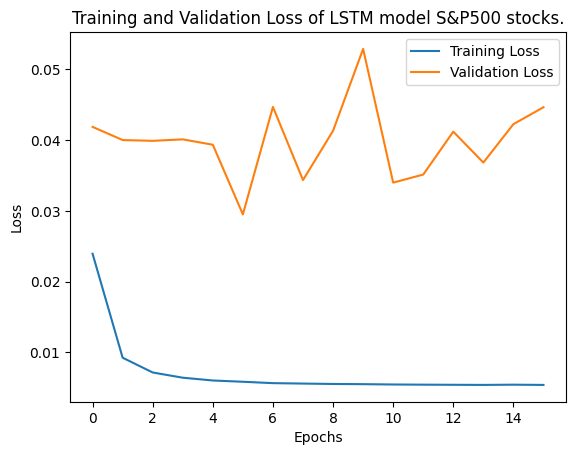

In [52]:
plt.plot(history_lstm_sp500.history['loss'], label='Training Loss')
plt.plot(history_lstm_sp500.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of LSTM model S&P500 stocks.')
plt.legend()

plt.show()

In [54]:
values_sp500 = [y_test_sp500[i, 0, 3] for i in range(964)]

In [55]:
input_layer = Input(shape=(window_size, num_features))  

rnn_layer = SimpleRNN(128, activation='tanh')(input_layer)

lstm_layer = LSTM(128, activation='tanh')(input_layer)

gru_layer = GRU(128, activation='tanh')(input_layer)

average_layer = Average()([rnn_layer, lstm_layer, gru_layer])

dropout_layer = Dropout(0.2)(average_layer)

dense_layer1 = Dense(32, activation='relu')(dropout_layer)

dense_layer2 = Dense(look_ahead)(dense_layer1)

Ensemble_Model_sp500 = Model(inputs=input_layer, outputs=dense_layer2)

from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)
Ensemble_Model_sp500.compile(optimizer=optimizer, loss='huber_loss', metrics=['mae'])

Ensemble_Model_sp500._name = "Ensemble_Model_sp500"

In [56]:
history_ensemble_sp500 = lstm_model_sp500.fit(X_train_sp500, y_train_sp500, epochs=epochs, 
                            validation_data=(X_val_sp500, y_val_sp500),
                            callbacks=[early_stopping, model_checkpoint_ensemble_sp500])

Epoch 1/50
111/112 [============================>.] - ETA: 0s - loss: 0.0057 - mae: 0.0831
Epoch 1: val_loss improved from inf to 0.03501, saving model to Ensemble_Model_sp500.h5
112/112 [==============================] - 5s 47ms/step - loss: 0.0057 - mae: 0.0832 - val_loss: 0.0350 - val_mae: 0.2484
Epoch 2/50
111/112 [============================>.] - ETA: 0s - loss: 0.0055 - mae: 0.0820
Epoch 2: val_loss did not improve from 0.03501
112/112 [==============================] - 5s 44ms/step - loss: 0.0055 - mae: 0.0820 - val_loss: 0.0402 - val_mae: 0.2676
Epoch 3/50
112/112 [==============================] - ETA: 0s - loss: 0.0055 - mae: 0.0816
Epoch 3: val_loss did not improve from 0.03501
112/112 [==============================] - 5s 46ms/step - loss: 0.0055 - mae: 0.0816 - val_loss: 0.0433 - val_mae: 0.2788
Epoch 4/50
112/112 [==============================] - ETA: 0s - loss: 0.0055 - mae: 0.0814
Epoch 4: val_loss did not improve from 0.03501
112/112 [==============================] 

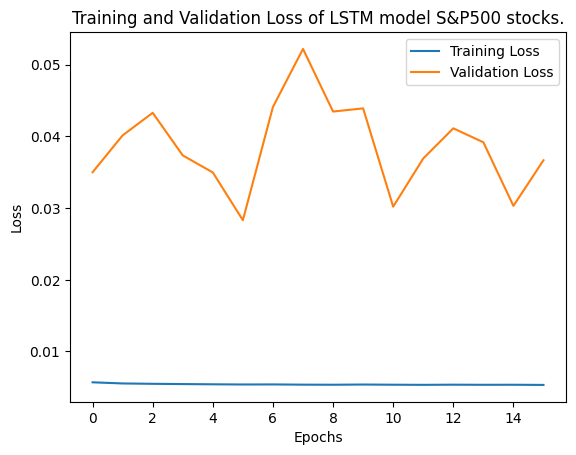

In [57]:
plt.plot(history_ensemble_sp500.history['loss'], label='Training Loss')
plt.plot(history_ensemble_sp500.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of LSTM model S&P500 stocks.')
plt.legend()

plt.show()

31/31 [==============================] - 1s 15ms/step


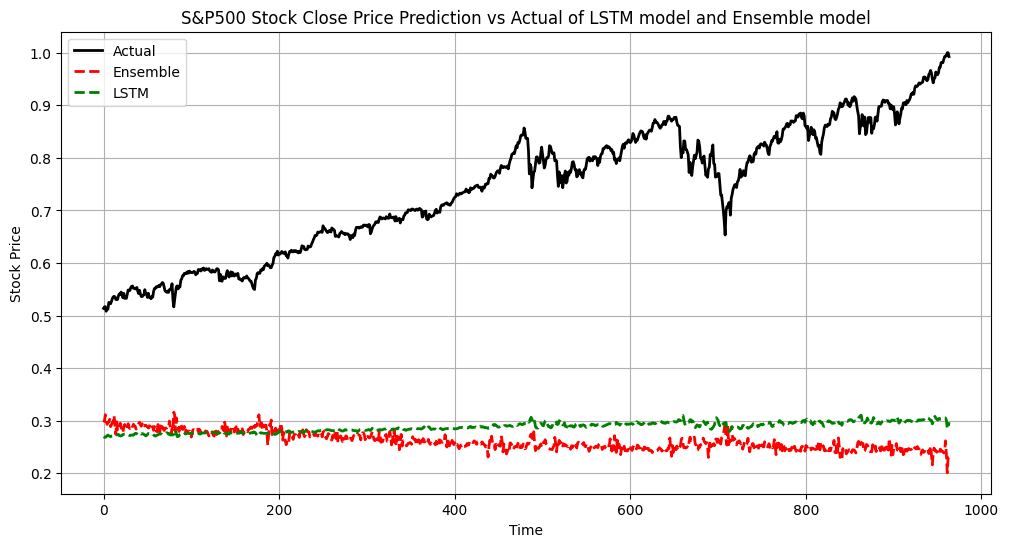

In [58]:
y_pred_ensemble_sp500 = Ensemble_Model_sp500.predict(X_test_sp500)
y_pred_lstm_sp500 = lstm_model_sp500.predict(X_test_sp500)

plt.figure(figsize=(12, 6))
plt.plot(values_sp500, label='Actual', color='black', linewidth=2)
plt.plot(y_pred_ensemble_sp500, label='Ensemble', color='red', linewidth=2, linestyle='dashed')
plt.plot(y_pred_lstm_sp500, label='LSTM', color='green', linewidth=2, linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('S&P500 Stock Close Price Prediction vs Actual of LSTM model and Ensemble model')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
mae_lstm_DOW = history_lstm_DOW.history['mae'][-1]  
mse_lstm_DOW = 2 * mae_lstm_DOW * np.var(y_test_dow)  

print(f'MAE of LSTM mode DOW stockl: {mae_lstm_DOW}')
print(f'Corresponding MSE of LSTM model DOW stock: {mse_lstm_DOW}')

MAE of LSTM mode DOW stockl: 0.07248494029045105
Corresponding MSE of LSTM model DOW stock: 0.007138546314282287


In [60]:
mae_ensemble_DOW = history_ensemble_DOW.history['mae'][-1]  
mse_ensemble_DOW = 2 * mae_ensemble_DOW * np.var(y_test_dow)  

print(f'MAE of ensemble model DOW stock: {mae_ensemble_DOW}')
print(f'Corresponding MSE of ensemble model DOW stock: {mse_ensemble_DOW}')

MAE of ensemble model DOW stock: 0.07216985523700714
Corresponding MSE of ensemble model DOW stock: 0.007107515741063428


In [61]:
mae_lstm_sp500 = history_lstm_sp500.history['mae'][-1]  
mse_lstm_sp500 = 2 * mae_lstm_sp500 * np.var(y_test_sp500)  

print(f'MAE of LSTM model S&P500 stock: {mae_lstm_sp500}')
print(f'Corresponding MSE of LSTM model S&P500 stock: {mse_lstm_sp500}')

MAE of LSTM model S&P500 stock: 0.08094771951436996
Corresponding MSE of LSTM model S&P500 stock: 0.006637735454652441


In [62]:
mae_ensemble_sp500 = history_ensemble_sp500.history['mae'][-1]  
mse_ensemble_sp500 = 2 * mae_ensemble_sp500 * np.var(y_test_sp500)  

print(f'MAE of LSTM model S&P500 stock: {mae_ensemble_sp500}')
print(f'Corresponding MSE of LSTM S&P500 stock: {mse_ensemble_sp500}')

MAE of LSTM model S&P500 stock: 0.08052687346935272
Corresponding MSE of LSTM S&P500 stock: 0.006603225962220536


In [63]:
models = ['LSTM', 'Ensemble']

In [64]:
mae_values_DOW = [mae_lstm_DOW, mae_ensemble_DOW]
mse_values_DOW = [mse_lstm_DOW, mse_ensemble_DOW]

In [65]:
mae_values_sp500 = [mae_lstm_sp500, mae_ensemble_sp500]
mse_values_sp500 = [mse_lstm_sp500, mse_ensemble_sp500]

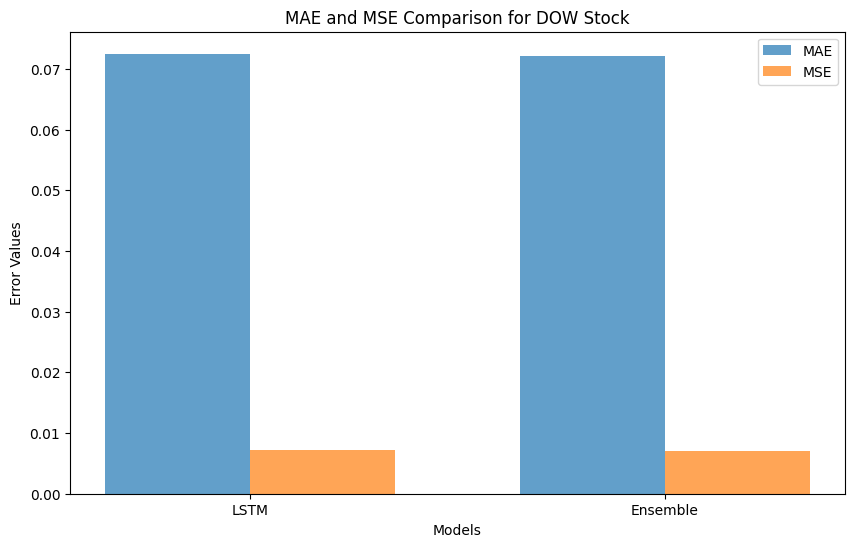

In [66]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, mae_values_DOW, bar_width, label='MAE', alpha=0.7)
plt.bar(index + bar_width, mse_values_DOW, bar_width, label='MSE', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Error Values')
plt.title('MAE and MSE Comparison for DOW Stock')
plt.xticks(index + bar_width / 2, models)
plt.legend()

plt.show()

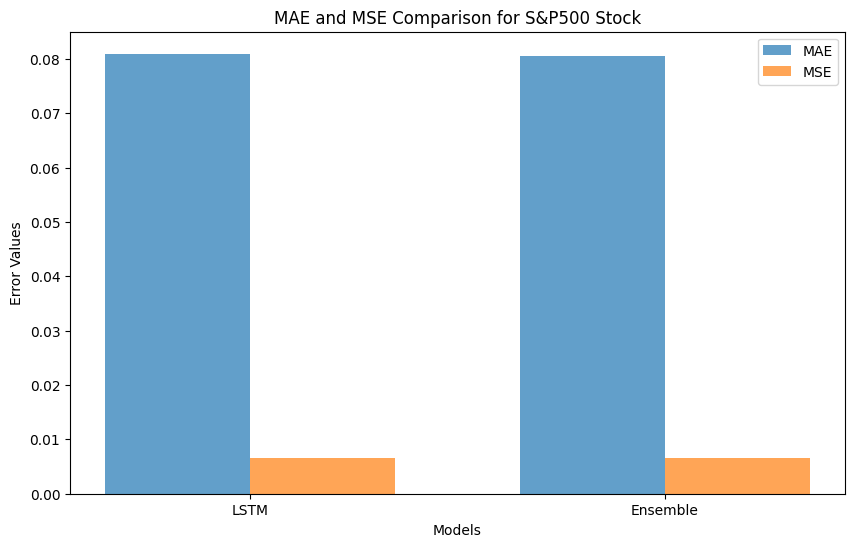

In [67]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, mae_values_sp500, bar_width, label='MAE', alpha=0.7)
plt.bar(index + bar_width, mse_values_sp500, bar_width, label='MSE', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Error Values')
plt.title('MAE and MSE Comparison for S&P500 Stock')
plt.xticks(index + bar_width / 2, models)
plt.legend()

plt.show()